In [216]:
import os
import cv2
import imghdr

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'./images/'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
        os.remove(bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  1. ACO
file  ./images/1. ACO\ac1687.jpg  is not a valid image file
file  ./images/1. ACO\ac1946.jpg  is not a valid image file
processing class directory  2. Grow Home
processing class directory  3. Rainbow
processing class directory  4. Anno
improper image files are listed below
./images/1. ACO\ac1687.jpg
./images/1. ACO\ac1763.jpg
./images/1. ACO\ac1912.jpg
./images/1. ACO\ac1916.jpg
./images/1. ACO\ac1921.jpg
./images/1. ACO\ac1929.jpg
./images/1. ACO\ac1931.jpg
./images/1. ACO\ac1933.jpg
./images/1. ACO\ac1946.jpg


In [234]:
#deci asta e partea de preprocesare
import os
import shutil
import random
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow

batch_size = 32

train_iterator = tensorflow.keras.utils.image_dataset_from_directory(
  './images/',
  validation_split=0.2,
  subset="training",
  image_size=(180, 180),
  batch_size=batch_size, seed = 256)

validation_iterator =  tensorflow.keras.utils.image_dataset_from_directory(
  './images/',
  validation_split=0.2,
  subset="validation",
  image_size=(180, 180),
  batch_size=batch_size, seed = 256)

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


train_iterator = train_iterator.map(process)
validation_iterator = validation_iterator.map(process)


Found 8195 files belonging to 4 classes.
Using 6556 files for training.
Found 8195 files belonging to 4 classes.
Using 1639 files for validation.


In [235]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE

train_iterator = train_iterator.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_iterator = validation_iterator.cache().prefetch(buffer_size=AUTOTUNE)

In [236]:



model = keras.Sequential([
  keras.layers.Conv2D(16, 3, activation='relu', input_shape=(180, 180, 3)),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(4)
])

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 89, 89, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_103 (Conv2D)         (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 43, 43, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 20, 20, 64)     

In [237]:
from PIL import Image


history = model.fit(train_iterator,
                    validation_data=validation_iterator,
                    epochs=5)

Epoch 1/5
205/205 [==============================] - 71s 313ms/step - loss: 0.8375 - accuracy: 0.6539 - val_loss: 0.6330 - val_accuracy: 0.7578
Epoch 2/5
205/205 [==============================] - 62s 304ms/step - loss: 0.5568 - accuracy: 0.7839 - val_loss: 0.4777 - val_accuracy: 0.8041
Epoch 3/5
205/205 [==============================] - 61s 296ms/step - loss: 0.3799 - accuracy: 0.8606 - val_loss: 0.4915 - val_accuracy: 0.8145
Epoch 4/5
205/205 [==============================] - 61s 297ms/step - loss: 0.2584 - accuracy: 0.9111 - val_loss: 0.4611 - val_accuracy: 0.8359
Epoch 5/5
205/205 [==============================] - 61s 299ms/step - loss: 0.1562 - accuracy: 0.9472 - val_loss: 0.4960 - val_accuracy: 0.8517


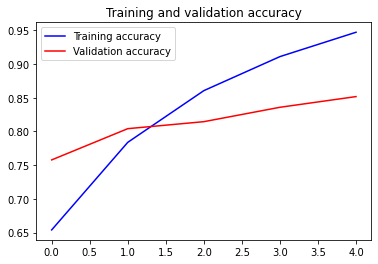

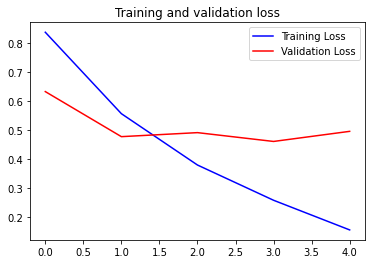

In [238]:
import matplotlib.pyplot as plt

def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_result(history)

In [239]:


model.save("modelxd")



INFO:tensorflow:Assets written to: modelxd\assets


In [240]:

import tensorflowjs
import keras

model = keras.models.load_model("modelxd")


tensorflowjs.converters.save_keras_model(model, 'modelxdjs')

In [251]:
import tensorflow as tf
import numpy as np
import scipy
def load_and_predict():

    imgnames = os.listdir('./input_test')
    games = ['AC Origins', 'Grow Home', 'Rainbow', 'Anno 2205']


    for imgname in imgnames:

        
        print(imgname, end = ' ')
        img = tf.keras.utils.load_img(
            './input_test/' + imgname , target_size=(180, 180)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array /= 255.0
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        scoreName = []
        for i in range(0, 4):
            if (score[i] > 0.1):
                scoreName.append((float(score[i]), games[i]))

        scoreName.sort(reverse=True)

        for p in scoreName:
            print(
        " -> {} : {:.2f}"
        .format(p[1], p[0]*100), end='\t')

        print()

    
    


load_and_predict()


2810131-growhome_0004.jpg  -> Grow Home : 100.00	
2810143-growhome_0006a.jpg  -> Grow Home : 68.69	 -> AC Origins : 18.36	
2969845-anno_2205_8-100625323-orig.jpg  -> Anno 2205 : 100.00	
3665387-siege review screenshot (19).jpg  -> Rainbow : 100.00	
3665393-siege review screenshot (11).jpg  -> Rainbow : 99.06	
3665399-image.png  -> Rainbow : 100.00	
ACOrigins1.jpg  -> AC Origins : 99.79	
ACOrigins2.jpg  -> AC Origins : 93.02	
ACOrigins3.jpg  -> Rainbow : 46.53	 -> AC Origins : 34.98	 -> Grow Home : 10.52	
ACOrigins4.jpg  -> AC Origins : 95.32	
ACOrigins5.jpg  -> Anno 2205 : 99.56	
Anno-2205-Shot-(3).jpg  -> Anno 2205 : 100.00	
Grow-Up-Aerial-View-e1474680372467.jpg  -> Grow Home : 99.98	
Grow-Up-Coming-To.png  -> Grow Home : 99.78	
GrowHome_Launch_01_192711-1024x576.jpg  -> Grow Home : 99.97	
maxresdefault.jpg  -> Anno 2205 : 99.93	
s6-bcd5de93ce1bc11549593988857f8ab6.jpg  -> Anno 2205 : 100.00	
ss_aa428eb82138893ab59ebd60016b72cc6c06640a.1920x1080.jpg  -> Anno 2205 : 100.00	
tom-clancy

C:\Users\vladn\AppData\Local\Temp\ipykernel_19364\2205927485.py:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


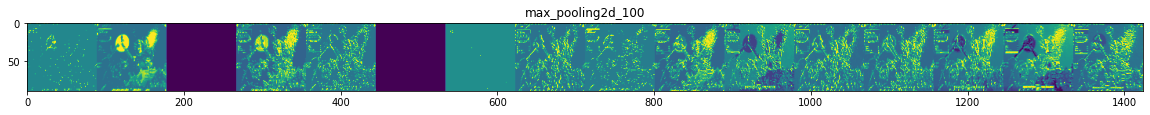

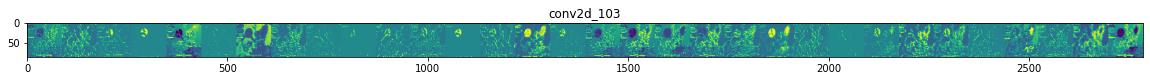

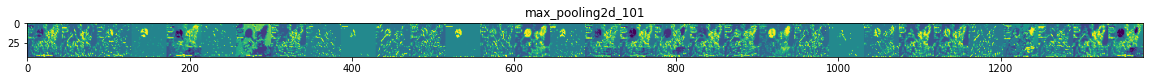

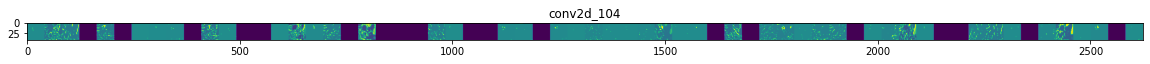

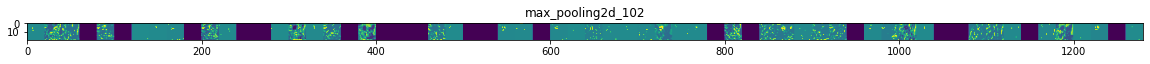

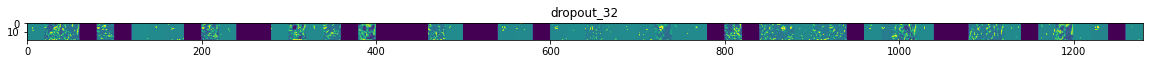

In [252]:
import tensorflow as tf
import numpy as np
import scipy
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img

def load_and_predict2():

    games = ['AC Origins', 'Grow Home', 'Rainbow', 'Anno 2205']


    layer_outputs = [layer.output for layer in model.layers[1:]]
    visual_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

        
    img = tf.keras.utils.load_img(
        './input_test/2969845-anno_2205_8-100625323-orig.jpg' , target_size=(180, 180)
    )
    img_array = tf.keras.utils.img_to_array(img)
    x = tf.expand_dims(img_array, 0) # Create a batch

    feature_maps = visual_model.predict(x)

    # Plotting intermediate representations for your image

    # Collect the names of each layer except the first one for plotting
    layer_names = [layer.name for layer in model.layers[1:]]

    # Plotting intermediate representation images layer by layer
    for layer_name, feature_map in zip(layer_names, feature_maps):
        if len(feature_map.shape) == 4: # skip fully connected layers
            # number of features in an individual feature map
            n_features = feature_map.shape[-1]  
            # The feature map is in shape of (1, size, size, n_features)
            size = feature_map.shape[1] 
            # Tile our feature images in matrix `display_grid
            display_grid = np.zeros((size, size * n_features))
            # Fill out the matrix by looping over all the feature images of your image
            for i in range(n_features):
                # Postprocess each feature of the layer to make it pleasible to your eyes
                x = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                # We'll tile each filter into this big horizontal grid
                display_grid[:, i * size : (i + 1) * size] = x
            # Display the grid
            scale = 20. / n_features
            plt.figure(figsize=(scale * n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

    
    


load_and_predict2()
